# Week 12 Final Project

## Research Question:

I am looking to answer the question of what school locations are best in terms of graduation rates, rural
schools or urban schools. Additionally I want to see what other factors may also impact graduation rates,
since I know that location alone may not be enough to explain differences in graduation rates.

The following are some research questions I am trying to answer with this problem statement:

1) Do urban schools have higher graduation rates than rural schools?
2) Does class size affect graduation rates?
3) Does cultural ethnicity affect graduation rates?
4) Does the distinction of economic-status affect graduation rates?

## Dataset:

Texas Education Agency (2021, August 1). Four-Year Graduation and Dropout Data, Class of 2020, 2019,
and 2018. Retrieved October 24, 2023, from https://tea.texas.gov

- campus-data-download-4yr-longitudinal-2018-2020-class.csv

**Source**

https://tea.texas.gov/reports-and-data/school-performance/accountability-research/completion-graduation-and-dropout/four-year-graduation-and-dropout-data-class-of-2020

## Chapter 1) Variables

***Instructions)***

A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).

***Answer)*** 

Variables in the final dataset

- **CAMPUS:** Campus number
- **DISTRICT:** District number
- **COUNTY:**            County number
- **REGION:**            Region number
- **CAMP_ALLD:**         Campus all students denominator
- **CAMP_ALLR_GRAD:**    Campus all students graduation rate
- **CAMP_HSD:**          Campus Hispanic denominator
- **CAMP_HSR_GRAD:**     Campus Hispanic graduation rate
- **CAMP_ECND:**         Campus economically disadvantaged denominator
- **CAMP_ECNN_GRAD:**    Campus economically disadvantaged graduation numerator
- **CAMP_NECND:**        Campus not economically disadvantaged denominator
- **CAMP_NECNN_GRAD:**   Campus not economically disadvantaged graduation numerator
- **REGION_TYPE:**       Region type indicator
- **PREPATORY:**         Preparatory school indicator

***Instructions)***

Describe what the 5 variables mean in the dataset (Chapter 1).

***Answer)***

The raw dataset has 347 variables. The dataset has four-year longitudinal graduation, completion, and dropout data for the class of 2020, 2019, and 2018 by multiple student characteristics.

For the purposes of this project I will focus on the variables listed above.

These variables have information pertaining to the schools, and students. Minaly the data tells us the

- School classifications
- Class size
- Overall graduation rate
- Hispanic students graduation rate
- Economically disadvataged graduation rate
- Non-Economically disadvataged graduation rate
- School Region type
- School Preparatory indicator

## Chapter 2) EDA

***Instructions)***

Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

***Answer)***

In [31]:
import pandas as pd

# reading the data
df_hs = pd.read_csv('C:/Users/ivan2/gitLocal/DSC530-FALL2023/Final_Project/School_data/campus-data-download-4yr-longitudinal-2018-2020-class.csv.csv')
df_hs.head

<bound method NDFrame.head of          CAMPUS          CAMPNAME  DISTRICT           DISTNAME  COUNTY  \
0       1902001        Cayuga H S      1902         Cayuga ISD       1   
1       1903001       Elkhart H S      1903        Elkhart ISD       1   
2       1904001     Frankston H S      1904      Frankston ISD       1   
3       1906002        Neches H S      1906         Neches ISD       1   
4       1907001     Palestine H S      1907      Palestine ISD       1   
...         ...               ...       ...                ...     ...   
5551  252902002  Newcastle School    252902      Newcastle ISD     252   
5552  252903001          Olney HS    252903          Olney ISD     252   
5553  253901001         Zapata HS    253901  Zapata County ISD     253   
5554  254901001   Crystal City HS    254901   Crystal City ISD     254   
5555  254902001       La Pryor HS    254902       La Pryor ISD     254   

             CNTYNAME  REGION       REGNNAME  CAMP_ALLD  CAMP_ALLR_GRAD  \
0     

In [32]:
data_types = df_hs.dtypes

print(data_types)

CAMPUS               int64
CAMPNAME            object
DISTRICT             int64
DISTNAME            object
COUNTY               int64
CNTYNAME            object
REGION               int64
REGNNAME            object
CAMP_ALLD            int64
CAMP_ALLR_GRAD       int64
CAMP_HSD             int64
CAMP_HSR_GRAD      float64
CAMP_ECND            int64
CAMP_ECNN_GRAD       int64
CAMP_NECND           int64
CAMP_NECNN_GRAD      int64
REGION_TYPE          int64
PREPATORY            int64
dtype: object


In [33]:
import numpy as np
import thinkstats2
import thinkplot

In [34]:
# Unique counts of classification variables
unique_campuses = df_hs['CAMPUS'].nunique()
unique_districts = df_hs['DISTRICT'].nunique()
unique_county = df_hs['COUNTY'].nunique()
unique_metro = df_hs['REGION'].nunique()

print(f'There are {unique_campuses} unique campuses.')
print(f'There are {unique_districts} unique districts.')
print(f'There are {unique_county} unique counties.')
print(f'There are {unique_metro} unique metropolitan cities.')

There are 1942 unique campuses.
There are 1074 unique districts.
There are 252 unique counties.
There are 20 unique metropolitan cities.


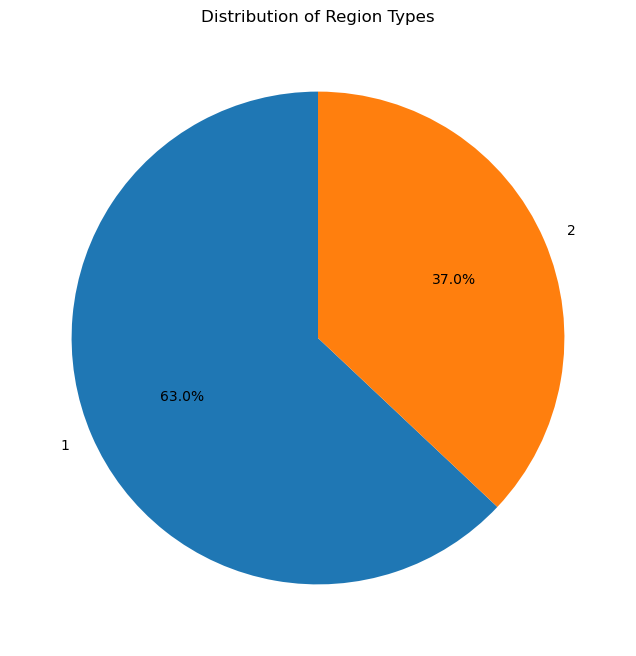

In [35]:
import matplotlib.pyplot as plt

# Visualizing Counts the in the Region_Type variable
region_type_counts = df_hs['REGION_TYPE'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_type_counts, labels=region_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Region Types')
plt.show()

# 1 = Rural
# 2 = Urban

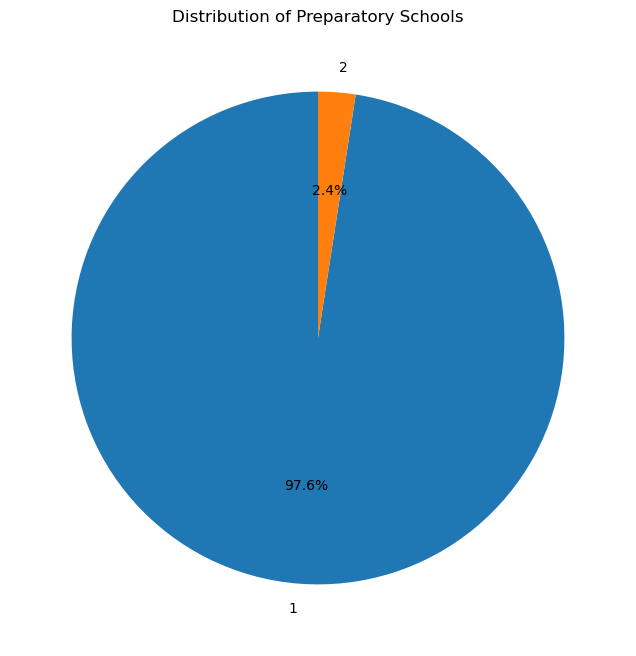

In [36]:
# Visualizing Counts the in the Preparatory Schools variable
prepatory_counts = df_hs['PREPATORY'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(prepatory_counts, labels=prepatory_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Preparatory Schools')
plt.show()

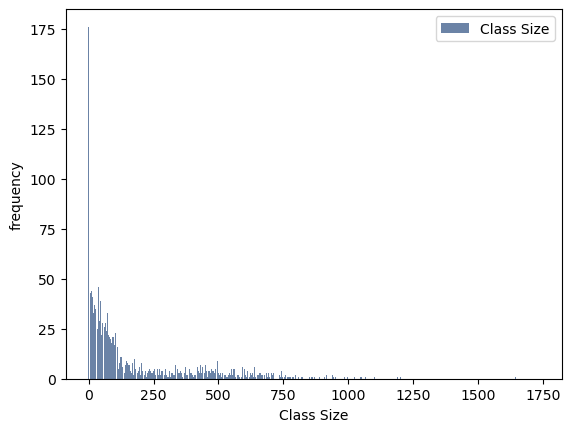

<Figure size 800x600 with 0 Axes>

In [37]:
# Create the histogram for Class Size
hist_CAMP_ALLD = thinkstats2.Hist(df_hs.CAMP_ALLD, label='Class Size')
thinkplot.Hist(hist_CAMP_ALLD)
thinkplot.Show(xlabel='Class Size', ylabel='frequency')

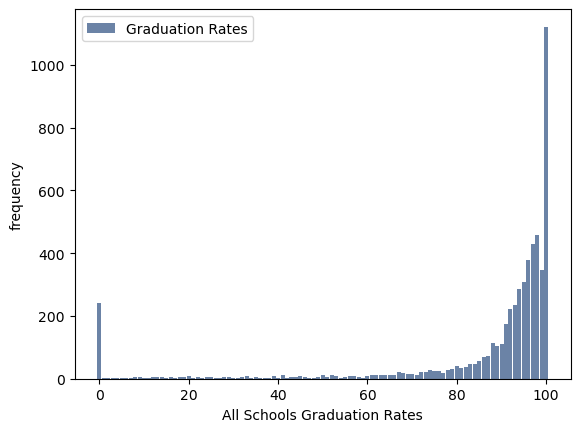

<Figure size 800x600 with 0 Axes>

In [38]:
# Create the histogram for Graduation Rates
hist_CAMP_ALLR_GRAD = thinkstats2.Hist(df_hs.CAMP_ALLR_GRAD, label='Graduation Rates')
thinkplot.Hist(hist_CAMP_ALLR_GRAD)
thinkplot.Show(xlabel='All Schools Graduation Rates', ylabel='frequency')

# Need to filter out classes with a size of 0

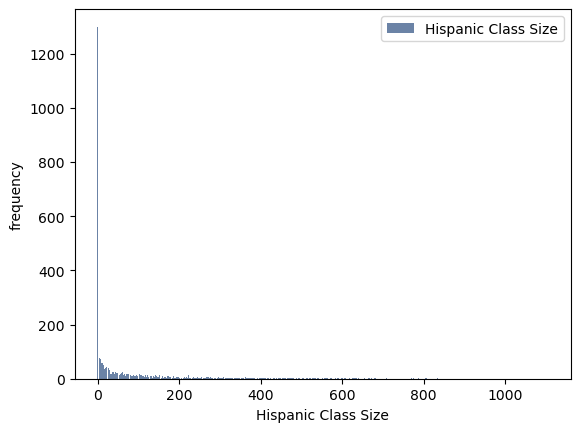

<Figure size 800x600 with 0 Axes>

In [39]:
# Create the histogram for Hispanic Class Size
hist_CAMP_HSD = thinkstats2.Hist(df_hs.CAMP_HSD, label='Hispanic Class Size')
thinkplot.Hist(hist_CAMP_HSD)
thinkplot.Show(xlabel='Hispanic Class Size', ylabel='frequency')

# Need to filter out classes with a size of 0

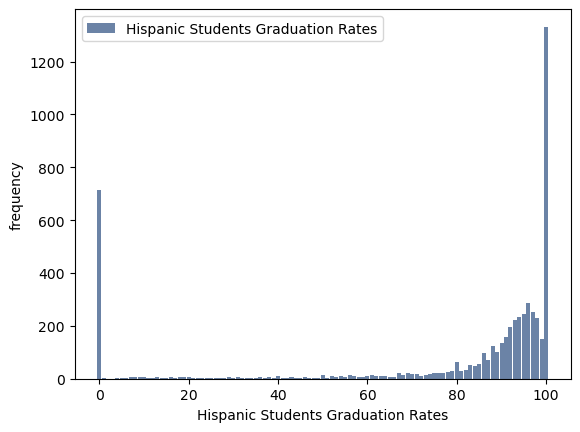

<Figure size 800x600 with 0 Axes>

In [40]:
# Create the histogram for Hispanic Graduation Rates 
hist_CAMP_HSR_GRAD = thinkstats2.Hist(df_hs.CAMP_HSR_GRAD, label='Hispanic Students Graduation Rates')
thinkplot.Hist(hist_CAMP_HSR_GRAD)
thinkplot.Show(xlabel='Hispanic Students Graduation Rates', ylabel='frequency')

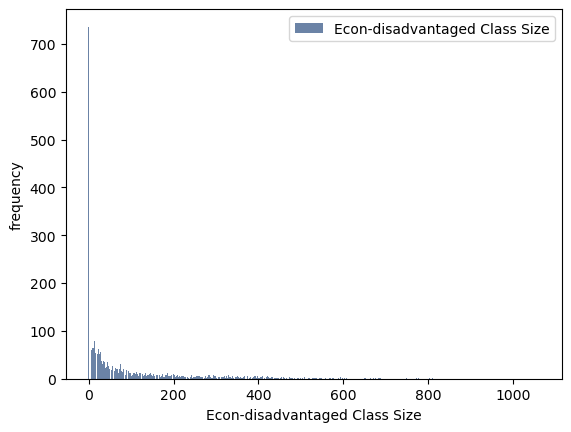

<Figure size 800x600 with 0 Axes>

In [41]:
# Create the histogram for Econ-disadvantaged Class Size
hist_CAMP_ECND = thinkstats2.Hist(df_hs.CAMP_ECND, label='Econ-disadvantaged Class Size')
thinkplot.Hist(hist_CAMP_ECND)
thinkplot.Show(xlabel='Econ-disadvantaged Class Size', ylabel='frequency')

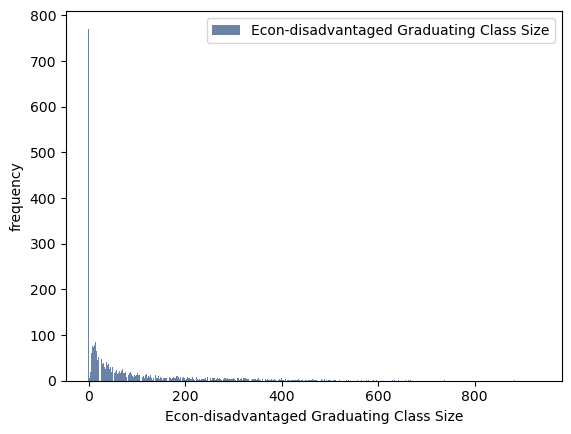

<Figure size 800x600 with 0 Axes>

In [42]:
# Create the histogram for Econ-disadvantaged Class Size
hist_CAMP_ECNN_GRAD = thinkstats2.Hist(df_hs.CAMP_ECNN_GRAD, label='Econ-disadvantaged Graduating Class Size')
thinkplot.Hist(hist_CAMP_ECNN_GRAD)
thinkplot.Show(xlabel='Econ-disadvantaged Graduating Class Size', ylabel='frequency')

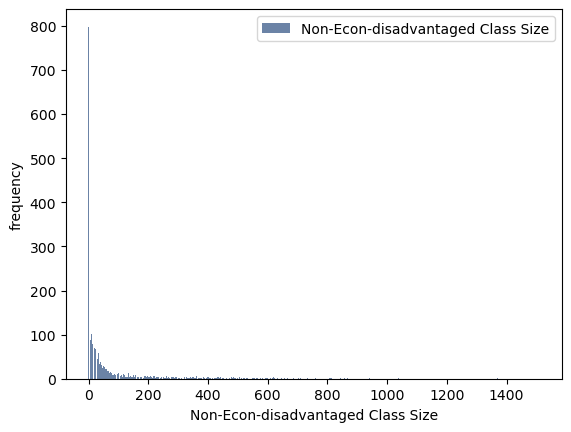

<Figure size 800x600 with 0 Axes>

In [43]:
# Create the histogram for Econ-disadvantaged Class Size
hist_CAMP_NECND = thinkstats2.Hist(df_hs.CAMP_NECND, label='Non-Econ-disadvantaged Class Size')
thinkplot.Hist(hist_CAMP_NECND)
thinkplot.Show(xlabel='Non-Econ-disadvantaged Class Size', ylabel='frequency')

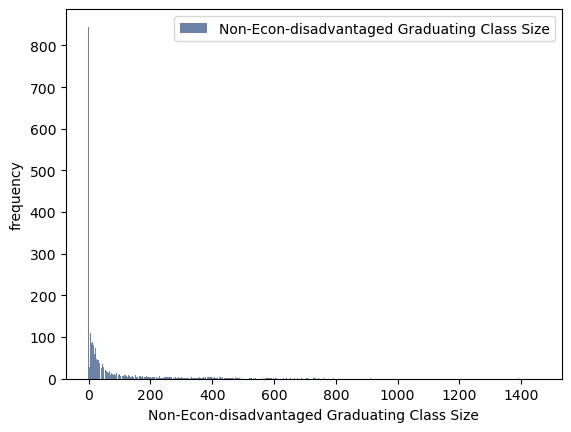

<Figure size 800x600 with 0 Axes>

In [44]:
# Create the histogram for Econ-disadvantaged Class Size
hist_CAMP_NECNN_GRAD = thinkstats2.Hist(df_hs.CAMP_NECNN_GRAD, label='Non-Econ-disadvantaged Graduating Class Size')
thinkplot.Hist(hist_CAMP_NECNN_GRAD)
thinkplot.Show(xlabel='Non-Econ-disadvantaged Graduating Class Size', ylabel='frequency')

***Outliers Instructions)***

In your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).

***Outliers Answer)***

The outliers in the data are the high counts of 0 values for certain variables. For example the variable of Hispanic Graduation Rates has a high 0 count. This occurs because some rural schools have a 0 count of hispanic students and thus a 0 graduation rate. Additionally, the variable for total class size 'CAMP_ALLD' should not be 0; zero values for this variable need to be filtered out.

To handle this I will first create a new data frame that filters out zero values in the 'CAMP_ALLD' variable. 

Then I will need to create a separate data frame for specifically analyzing hispanic and economic status variables. These separate data frames will filters out 0 class sizes for subsets like Hispanics or Econ-disadvantaged and thus will normalize the class size and graduation rates for these subsets.

***Final Data Cleaning*** to handle outliers and create two variables for Econ-dis graduation rate & Non-econ dis graduation rate.

In [45]:
df_hs_filtered = df_hs[df_hs['CAMP_ALLD'] != 0]

In [46]:
# Creating df_hs_hisp by filtering out rows where CAMP_HSD is 0
# Used when analysing the hispanic subset
df_hs_hisp = df_hs_filtered[df_hs_filtered['CAMP_HSD'] != 0]

In [47]:
# Creating df_hs_econ_dis by filter out rows where CAMP_ECND is 0
# Used when analysisng hte economically-disadvantaged subset
df_hs_econ_dis = df_hs_filtered[df_hs_filtered['CAMP_ECND'] != 0]

# Create a new variable 'CAMP_ECR' (CAMP_ECNN_GRAD / CAMP_ECND)
df_hs_econ_dis['CAMP_ECR'] = df_hs_econ_dis['CAMP_ECNN_GRAD'] / df_hs_econ_dis['CAMP_ECND']

# hides the warning that explain we are modifying a slice of a data frame.
# since we will only use this specific data frame when working with this subset we can ingnore this warning.
pd.options.mode.chained_assignment = None

In [48]:
# Creating df_hs_non_econ_dis by filter out rows where CAMP_NECND is 0
df_hs_non_econ_dis = df_hs_filtered[df_hs_filtered['CAMP_NECND'] != 0]

# Create a new variable 'CAMP_NECNR' (CAMP_NECNN_GRAD / CAMP_NECND)
df_hs_non_econ_dis['CAMP_NECNR'] = df_hs_non_econ_dis['CAMP_NECNN_GRAD'] / df_hs_non_econ_dis['CAMP_NECND']

# hides the warning that explain we are modifying a slice of a data frame.
# since we will only use this specific data frame when working with this subset we can ingnore this warning.
pd.options.mode.chained_assignment = None

***Instructions)***

Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails

***Answer)***

In [49]:
# Summary statistics for continous variables
def print_summary_statistics(df, column_name):
    statistics = ['mean', 'median', 'var', 'std', 'skew', 'kurtosis']
    results = {}

    for stat in statistics:
        results[f"{column_name}_{stat}"] = getattr(df[column_name], stat)()

    for stat, value in results.items():
        print(f"{stat}: {value}")
        
    print()

# Print the results
print('Variable for All Schools Graduation Rate ')
print_summary_statistics(df_hs_filtered, 'CAMP_ALLR_GRAD')
print('Variable for All Schools Class Size')
print_summary_statistics(df_hs_filtered, 'CAMP_ALLD')
print('Variable for Hispanic Graduation Rate')
print_summary_statistics(df_hs_filtered, 'CAMP_HSR_GRAD')
print('Variable for Economically disadvantaged class size')
print_summary_statistics(df_hs_filtered, 'CAMP_ECND')
print('Variable for Non-economically disadvantaged class size')
print_summary_statistics(df_hs_filtered, 'CAMP_NECND')

Variable for All Schools Graduation Rate 
CAMP_ALLR_GRAD_mean: 89.49293680297397
CAMP_ALLR_GRAD_median: 96.0
CAMP_ALLR_GRAD_var: 332.86200624623643
CAMP_ALLR_GRAD_std: 18.244506193543206
CAMP_ALLR_GRAD_skew: -3.1806191594020525
CAMP_ALLR_GRAD_kurtosis: 10.644873323165843

Variable for All Schools Class Size
CAMP_ALLD_mean: 210.50669144981413
CAMP_ALLD_median: 94.5
CAMP_ALLD_var: 57268.244796264735
CAMP_ALLD_std: 239.30784524596083
CAMP_ALLD_skew: 1.5384593947863872
CAMP_ALLD_kurtosis: 2.2387693161530615

Variable for Hispanic Graduation Rate
CAMP_HSR_GRAD_mean: 79.66096598383763
CAMP_HSR_GRAD_median: 94.0
CAMP_HSR_GRAD_var: 1041.2527035028047
CAMP_HSR_GRAD_std: 32.26844749136228
CAMP_HSR_GRAD_skew: -1.7868941889524252
CAMP_HSR_GRAD_kurtosis: 1.6182856319119328

Variable for Economically disadvantaged class size
CAMP_ECND_mean: 110.68698884758365
CAMP_ECND_median: 51.0
CAMP_ECND_var: 19777.9867799255
CAMP_ECND_std: 140.6342304701295
CAMP_ECND_skew: 1.9440930623604413
CAMP_ECND_kurtosis:

## Chapter 3) PMF

***Instructions)***

Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

***Answer)***

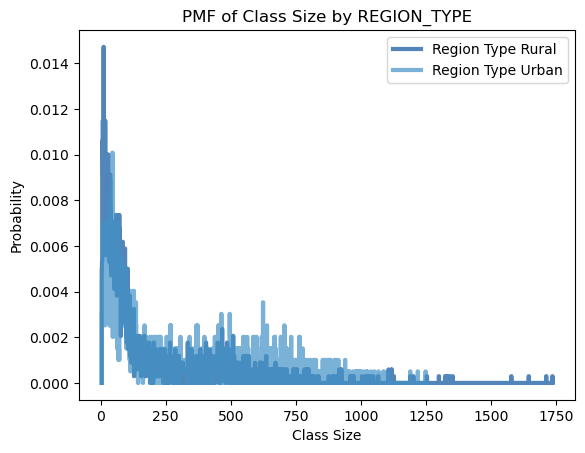

In [50]:
# Mapping for region types
region_type_names = {1: 'Region Type Rural', 2: 'Region Type Urban'}

# Converting 'CAMP_ALLD' to a probability mass function (PMF) for each 'REGION_TYPE'
pmfs = {}
for region_type, group in df_hs_filtered.groupby('REGION_TYPE'):
    label = region_type_names.get(region_type, f'Region Type {region_type}')
    pmfs[region_type] = thinkstats2.Pmf(group['CAMP_ALLD'], label=label)

# Plotting the PMFs
thinkplot.PrePlot(len(pmfs))
for pmf in pmfs.values():
    thinkplot.Pmf(pmf)

thinkplot.Config(xlabel='Class Size', ylabel='Probability', title='PMF of Class Size by REGION_TYPE')

This PMF shows us that class sizes are right-skewed, and that there are more rural schools with smaller class sizes and more urban schools with larger class sizes.

## Chapter 4) CDF

***Instructions)***

Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

***Answer)***

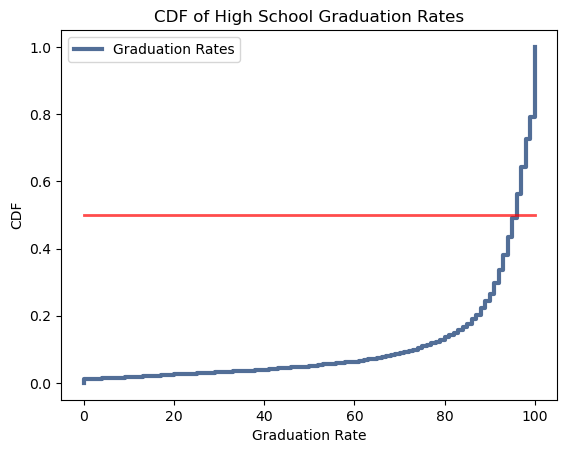

In [51]:
# Extracting the graduation rate variable from the data frame
grad_rates = df_hs_filtered['CAMP_ALLR_GRAD']
cdf = thinkstats2.Cdf(grad_rates, label='Graduation Rates')

# Plotting the CDF
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Graduation Rate', ylabel='CDF', title='CDF of High School Graduation Rates')
thinkplot.Plot([min(grad_rates), max(grad_rates)], [0.5, 0.5], color='red', linewidth=2)


Based on the CDF I can see that graduation rates start to rise at around 60% which means that there are more schools with high graduation rates. The red line is set at the Median Graduaion Rate, which the median is 96%.

In regards to the research question, this shows me that there is not much variability between graduation rates for most schools. While variation does exist and some schools do in fact have low graduation rates, the majority of schools have graduation rates concentrated above the 90% mark.

## Chapter 5) Ploting Analytical Distributions

***Instructions)***

Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

***Answer)***

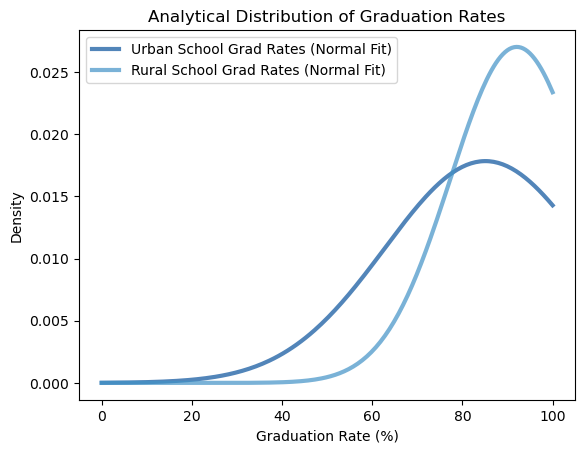

In [52]:
# Filter the graduation rates for Urban and Rural schools
urban_grad_rates = df_hs_filtered[df_hs_filtered['REGION_TYPE'] == 2]['CAMP_ALLR_GRAD'].dropna()
rural_grad_rates = df_hs_filtered[df_hs_filtered['REGION_TYPE'] == 1]['CAMP_ALLR_GRAD'].dropna()

# Estimate the mean and standard deviation parameters
urban_mean, urban_std = urban_grad_rates.mean(), urban_grad_rates.std()
rural_mean, rural_std = rural_grad_rates.mean(), rural_grad_rates.std()

# Generate a range of values used for plotting the PDF
min_rate, max_rate = min(urban_grad_rates.min(), rural_grad_rates.min()), max(urban_grad_rates.max(), rural_grad_rates.max())
xs = np.linspace(min_rate, max_rate, 200)

# Generate the PDFs for Urban and Rural
urban_pdf = thinkstats2.NormalPdf(urban_mean, urban_std)
rural_pdf = thinkstats2.NormalPdf(rural_mean, rural_std)

# Plot the PDFs
thinkplot.PrePlot(2)
thinkplot.Plot(xs, urban_pdf.Density(xs), label='Urban School Grad Rates (Normal Fit)')
thinkplot.Plot(xs, rural_pdf.Density(xs), label='Rural School Grad Rates (Normal Fit)')

# Plot settings
thinkplot.Config(xlabel='Graduation Rate (%)',
                 ylabel='Density',
                 title='Analytical Distribution of Graduation Rates')

My main problem aims to find out if urban schools have higher graduation rates than rural schools? This was my hypothesis before starting the analysis.

The PDF of Urban School Graduation Rates, and Rural School Graduation rates show that Rural schools actually have higher graduation rates that Urban schools. Based on visually interpreting this plot, Urban Schools have an approximate mean graduation rate of 80 and Rural Schools have an approximate mean gradution rate of 90.

Also the spread of Urban schools is more dispersed so while Rural schools generally perform better, there is more variability in the performance of Urban schools.

## Chapter 7) Correlation & Causation

***Instructions)***

Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

***Answer)***

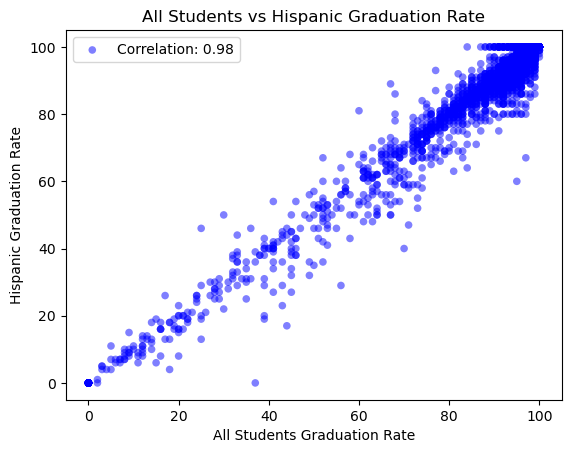

In [53]:
# Calculate Pearson's correlation coefficient 
corr_all_hisp = thinkstats2.Corr(df_hs_hisp['CAMP_ALLR_GRAD'], df_hs_hisp['CAMP_HSR_GRAD'])

# Scatter plot for All Students vs Hispanic Graduation Rate
thinkplot.Scatter(df_hs_hisp['CAMP_ALLR_GRAD'], df_hs_hisp['CAMP_HSR_GRAD'], alpha=0.5, label=f'Correlation: {corr_all_hisp:.2f}')
thinkplot.Config(xlabel='All Students Graduation Rate',
                 ylabel='Hispanic Graduation Rate',
                 title='All Students vs Hispanic Graduation Rate',
                 legend=True)



Another one of my main research questions asks:
- Does cultural ethnicity affect graduation rates?

This plot aims to show a cultural ethnicity (in this case Hispanic) differs from a School's broader performance.

Using the data frame that filters out schools with a Hispanic student count of zero, we see a very strong positive linear relationship between All Students Graduation Rate and Hispanic Students Graduation Rate.

This relationships indicates that the graduating outcome of Hispanic students are highly consistent with the broader school outcomes.

This confirms that ethnicity does not play a factor in determining a student's academic performance, rather the broader school performance is a more reliable predictor of student performance. 

Lastly, correlation does not equal causation. While both graduation rates move in tandem, we cannot say that one rate causes the other.

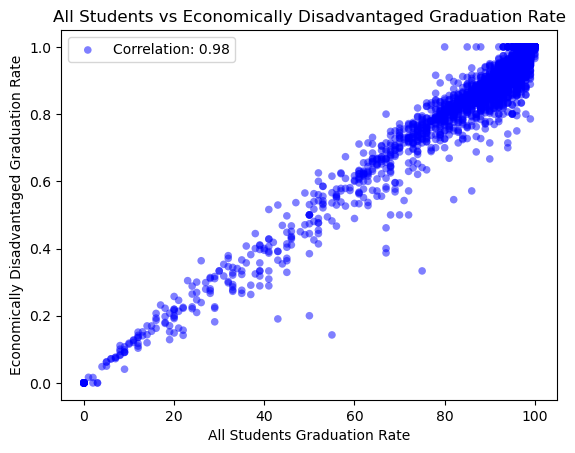

In [54]:
# Calculate Pearson's correlation coefficient 
corr_all_econ = thinkstats2.Corr(df_hs_econ_dis['CAMP_ALLR_GRAD'], df_hs_econ_dis['CAMP_ECR'])

# Scatter plot for All Students vs Economically Disadvantaged Graduation Rate
thinkplot.Scatter(df_hs_econ_dis['CAMP_ALLR_GRAD'], df_hs_econ_dis['CAMP_ECR'], alpha=0.5, label=f'Correlation: {corr_all_econ:.2f}')
thinkplot.Config(xlabel='All Students Graduation Rate',
                 ylabel='Economically Disadvantaged Graduation Rate',
                 title='All Students vs Economically Disadvantaged Graduation Rate',
                 legend=True)


This subset also mirrors closely the linear relationship we saw with the Hispanic Student subset. This again reaffirms that a student's performance is more likely to follow the School's overall performance than depend on classifications of Hispanic/Non-Hispanic or Econ-Disadvantaged/Non-Econ-Disadvantaged.

This again does not mean that one rate causes the other, only to say that they both have a linear relationship.

## Chapter 9) Hypothesis Testing

***Instructions)***

Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

***Answer)***

**1st Test)** 

My primary hypothesis is that Urban Schools have higher graduation rates than Rural schools. 

I will run a difference of mean t-test to test this hypothesis.

In [57]:
# Split the dataset based on region type
rural = df_hs_filtered[df_hs_filtered['REGION_TYPE'] == 1]['CAMP_ALLR_GRAD'].dropna()
urban = df_hs_filtered[df_hs_filtered['REGION_TYPE'] == 2]['CAMP_ALLR_GRAD'].dropna()

# Calculate the mean graduation rate for rural and urban regions
mean_grad_rural = rural.mean()
mean_grad_urban = urban.mean()

# Perform the t-test
t_stat, p_value = ttest_ind(rural, urban, equal_var=False)

# Print the results
print('Mean graduation rate for rural regions:', mean_grad_rural)
print('Mean graduation rate for urban regions:', mean_grad_urban)
print()
print(f't-statistic: {t_stat}, p-value: {p_value}')

Mean graduation rate for rural regions: 92.05740359140418
Mean graduation rate for urban regions: 85.0998487140696

t-statistic: 12.375386995046611, p-value: 2.4036028989649527e-34


In summary, the statistical analysis suggests that there is a statistically significant difference in graduation rates between rural and urban regions, with rural regions having a higher mean graduation rate. 

Given the very low p-value, this indicates that the observed difference in graduation rates between rural and urban regions is statistically significant and not likely due to random chance.

This could warrant further investigation into the factors contributing to higher graduation rates in rural areas compared to urban areas.

**2nd Test**

My second side-bar hypothesis was that Middle sized classes on average result in higher graduation rates than very small or very large classes.

My thought process is that there is a sweet spot of Class Size that will result in higher graduation rates. 

To test this I ran a difference of means hypothesis test on groups of class size quartiles. Quartiles between .25 and .75 are in the middle class size group, and the remaining quartiles are in the extreme class size group.

In [55]:
# Testing a Difference in Means

from scipy.stats import ttest_ind

# Calculate quartiles for class size
quartiles = df_hs_filtered['CAMP_ALLD'].quantile([0.25, 0.5, 0.75])

# Define the quartiles
Q1 = df_hs_filtered[df_hs_filtered['CAMP_ALLD'] <= quartiles[0.25]]
Q2 = df_hs_filtered[(df_hs_filtered['CAMP_ALLD'] > quartiles[0.25]) & (df_hs_filtered['CAMP_ALLD'] <= quartiles[0.5])]
Q3 = df_hs_filtered[(df_hs_filtered['CAMP_ALLD'] > quartiles[0.5]) & (df_hs_filtered['CAMP_ALLD'] <= quartiles[0.75])]
Q4 = df_hs_filtered[df_hs_filtered['CAMP_ALLD'] > quartiles[0.75]]

# Combine Q2 and Q3, and Q1 and Q4 to match the hypothesis
middle_class = pd.concat([Q2, Q3])
extreme_class = pd.concat([Q1, Q4])

# Calculate the mean graduation rate for the middle and extreme quartiles
mean_grad_middle_class = middle_class['CAMP_ALLR_GRAD'].mean()
mean_grad_extreme_class = extreme_class['CAMP_ALLR_GRAD'].mean()

# Dropping NA values that may interfere with the test
middle_class_grad_rates = pd.concat([Q2, Q3])['CAMP_ALLR_GRAD'].dropna()
extreme_class_grad_rates = pd.concat([Q1, Q4])['CAMP_ALLR_GRAD'].dropna()

# Perform a t-test to determine if there is a significant difference between the two groups
t_stat, p_value = ttest_ind(middle_class_grad_rates, extreme_class_grad_rates, equal_var=False)

# Print the results
print('Mean graduation rate for middle class quartiles \n', mean_grad_middle_class)
print('Mean graduation rate for extremes class quartiles \n',mean_grad_extreme_class)
print()
print(f't-statistic: {t_stat}, p-value: {p_value}')

Mean graduation rate for middle class quartiles 
 88.79895755770663
Mean graduation rate for extremes class quartiles 
 90.184855233853

t-statistic: -2.7872405901875745, p-value: 0.0053347167026650405


- The mean graduation rate for schools in the middle class size group (2nd and 3rd quartiles) is approximately 88.80%.
- The mean graduation rate for schools in the extreme class size group (1st and 4th quartiles) is approximately 90.18%.
- The t-statistic is about -2.79. This suggests that the mean graduation rate of the middle class sizes is lower than that of the extreme class sizes.
- The p-value is approximately 0.0053 and indicates that the observed difference in means is statistically significant.

These results how that my hypothesis was incorrect. The middle quartiles do not have a higher mean graduation rate than the extreme quartiles. The extreme class group has a slightly higher mean graduation rate.

However, the difference in mean graduation rates is relitively small. Other factors would need to be consider to identify what factors have a strong influence on graduation rates.


## Chapter 10 & 11) Regression Analysis

***Instructions)***

For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

***Answer)***

I have used scatter plots to analize correlations and found two linear correlations that could be used for a linear regression (Graduation Rates vs Hispanic & Econ-Dis Graduation Rates). However, I will conduct a linear regression on different variables since I think it's relevant to the analysis done thus far.

I will run a regression analysis to see if Graduation Rates have a relationship with Class Size.

In [56]:
import statsmodels.formula.api as smf
model = smf.ols('CAMP_ALLR_GRAD ~ CAMP_ALLD', data=df_hs_filtered)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         CAMP_ALLR_GRAD   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     15.17
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           9.93e-05
Time:                        20:19:54   Log-Likelihood:                -23249.
No. Observations:                5380   AIC:                         4.650e+04
Df Residuals:                    5378   BIC:                         4.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.6417      0.331    267.917      0.000      87.993      89.290
CAMP_ALLD      0.0040      0.001      3.895      0.000       0.002       0.006
==============================================================================
Omnibus:                     3491.672   Durbin-Watson:                   1.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32817.585
Skew:                          -3.121   Prob(JB):                         0.00
Kurtosis:                      13.365   Cond. No.                         424.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results of the linear regression shows that while there is a statistically significant relationship between the two variable, the R-squred value is only .003 and thus the relationship is too weak to be practical.

This can be further used with the t-test done during hypothesis testing to reiterate that class size does not have a substantial impact on graduation rates. Rather, graduation rates may be influenced more by other factors not included in this dataset.

## Final Output - PowerPoint & Paper

Both the Power Point and Paper are external documents.